# Buffer Reconstruction

We use the logfile to reconstruct the timestamp of the NONVETO (or any buffer for that matter) using the logfile from the end, once we know that we have downloaded all the data

In [1]:
# import necessary modules
import matplotlib.pyplot as plt
import raadpy as rp
import numpy as np
import os

# Define some constants
raw_dir = '../../Data/TAIL/'
# SD      = '2022-09-19' 
# raw_dir = '../../Data/Light-1/light1-'+SD+'/'

# Get the subfiles and put the in a dictionary
fnames      = os.listdir(raw_dir)
filenames   = {}
for i in range(1,10): 
    res = [name for name in fnames if f'buff{i}' in name]
    if len(res)>0: filenames[f'buff{i}'] = res[0]
for name in fnames: 
    if 'log' in name: filenames['log'] = name

print(filenames)

%matplotlib widget

{'buff2': 'buff2_500000.dat', 'buff3': 'buff3_500000.dat', 'buff4': 'buff4_500000.dat', 'buff5': 'buff5_500000.dat', 'buff6': 'buff6_500000.dat', 'buff7': 'buff7_500000.dat', 'log': 'light1-se-log.txt'}


In [2]:
data = rp.get_dict(raw_dir+filenames['buff4'],struct=rp.NONVETO_STRUCT,VERIFY=True,STUPID=True,threshold=4*1e6,MAX=900000)

Line:   0%|          | 0/900000 [00:00<?, ?it/s]

(<Figure size 1400x600 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Channel '}>,
        <AxesSubplot:title={'center':'Adc_Counts '}>,
        <AxesSubplot:title={'center':'Stimestamp '}>, <AxesSubplot:>],
       dtype=object))

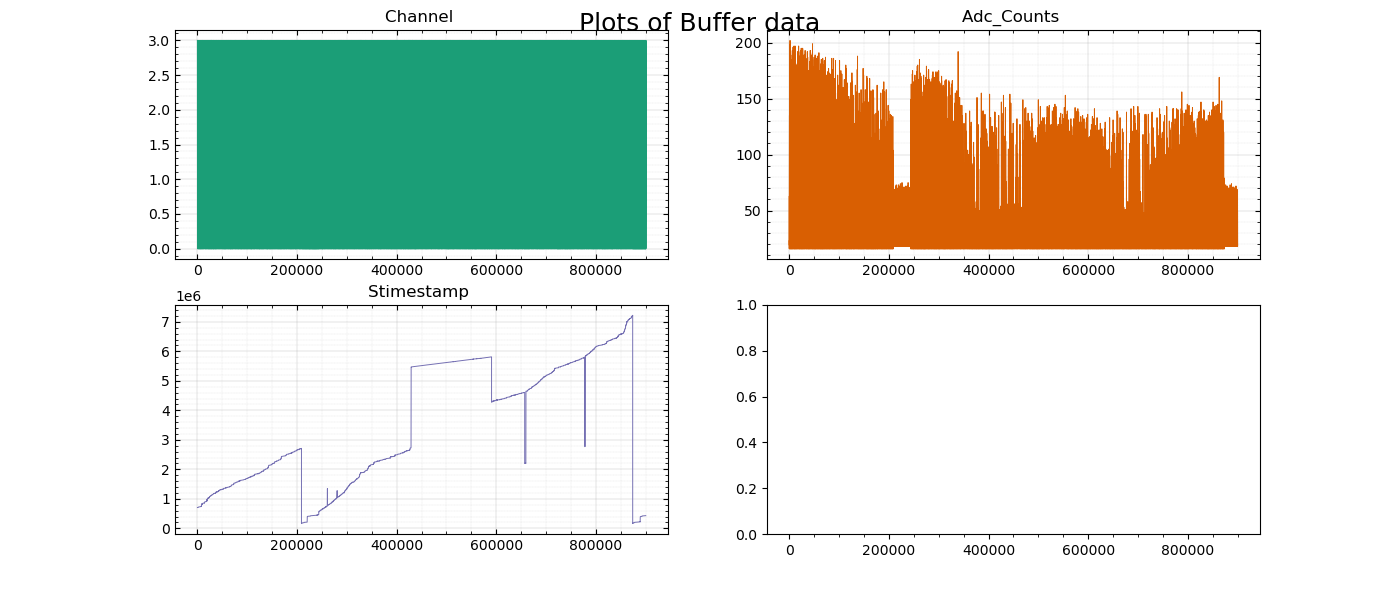

In [3]:
rp.plot_buffer(data)

(<Figure size 1400x1600 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Timestamp of Channel: 0'}>,
        <AxesSubplot:title={'center':'Timestamp of Channel: 1'}>,
        <AxesSubplot:title={'center':'Timestamp of Channel: 2'}>,
        <AxesSubplot:title={'center':'Timestamp of Channel: 3'}>],
       dtype=object))

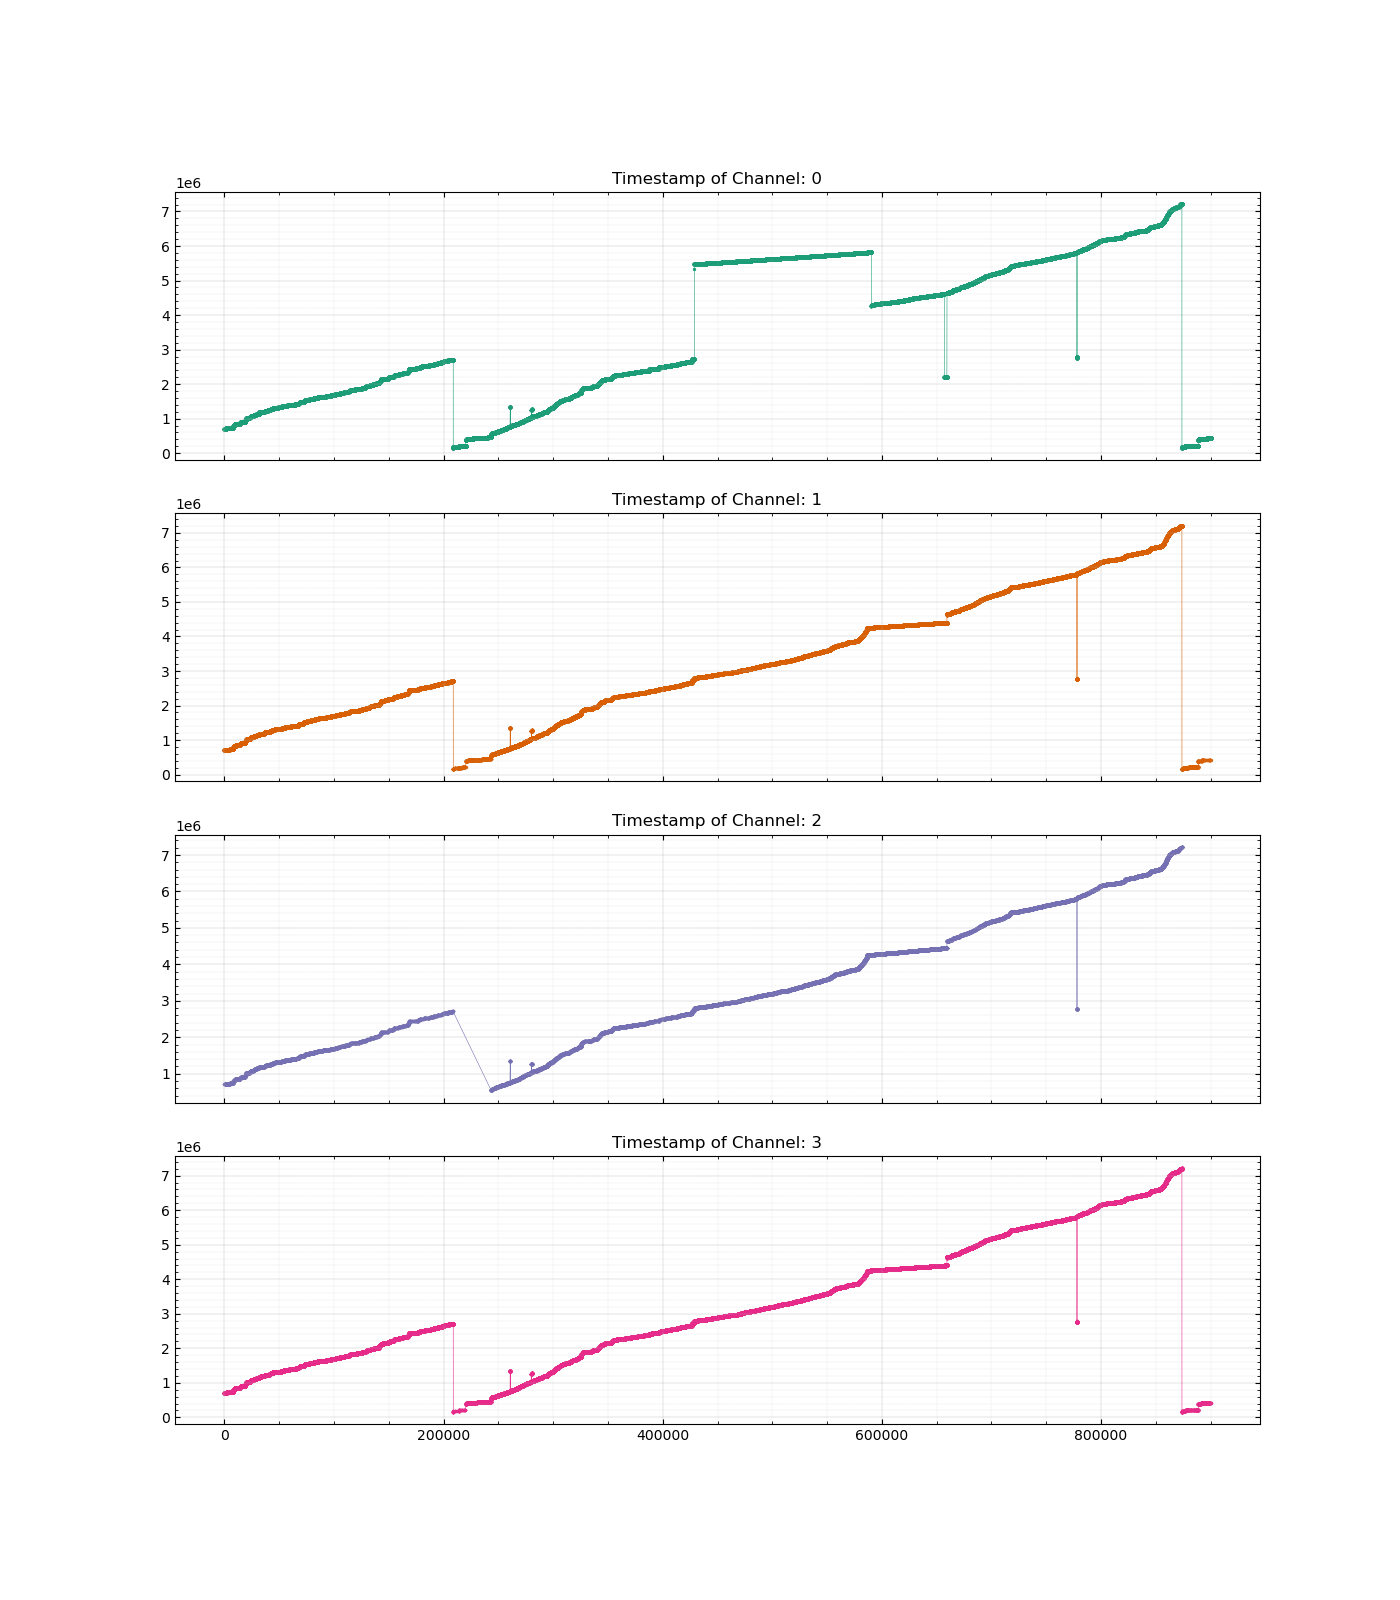

In [4]:
rp.plot_timestamps(data)